<StemContainer object of 3 artists>

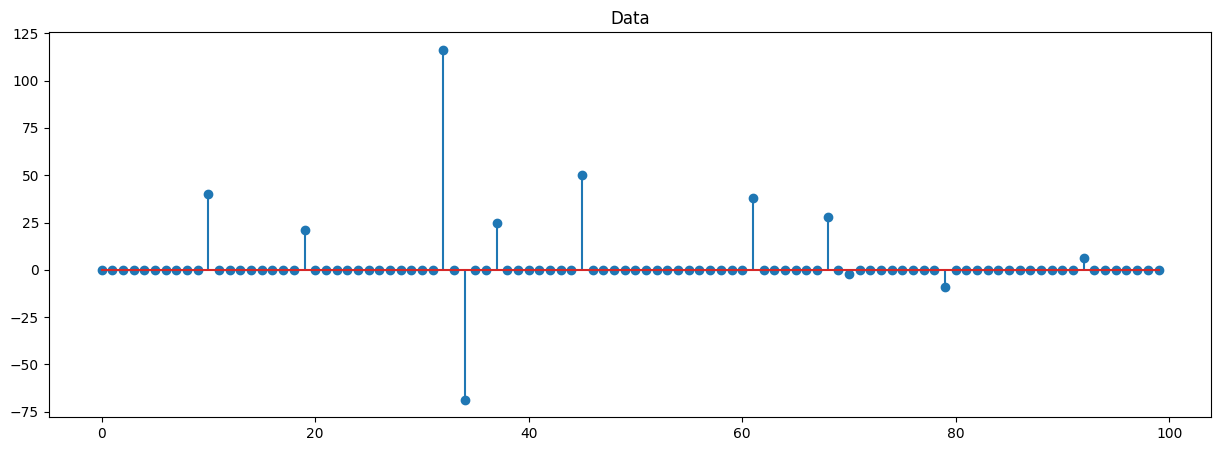

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200003 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


<StemContainer object of 3 artists>

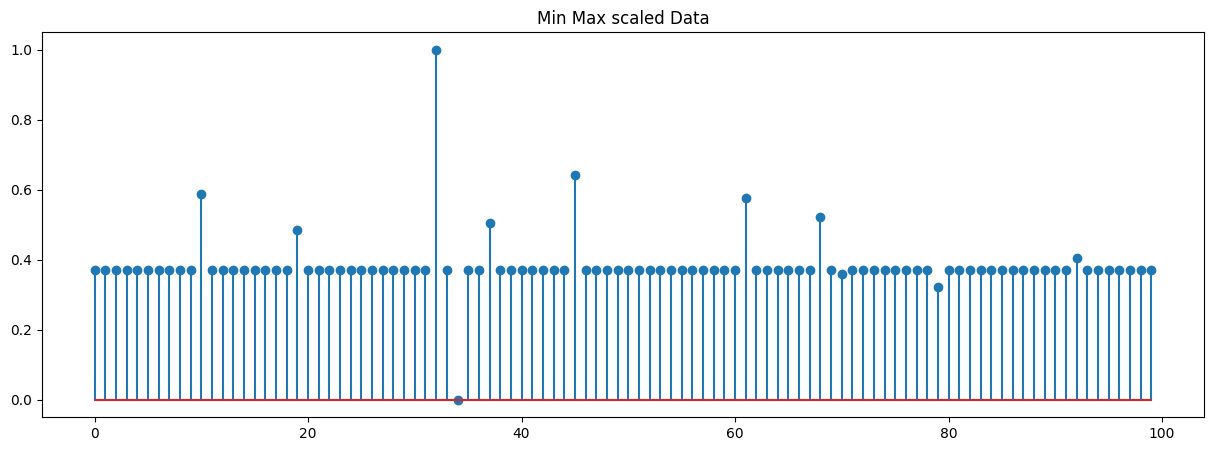

In [83]:
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)

plt.figure(figsize=(15,5))
plt.title("Min Max scaled Data")
plt.stem(scaled_data_min_max)


In [102]:
from sklearn import preprocessing

Max_Abs_Scaler = preprocessing.MaxAbsScaler().fit(signal)
Max_Abs_scaled_data = Max_Abs_Scaler.transform(signal)

In [103]:
def std_scale(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean :", mean, "std :", std)
    return (data - mean) / std

scaled_data_std = std_scale(signal)

mean : 2.44306826925761 std : 15.859309981851554


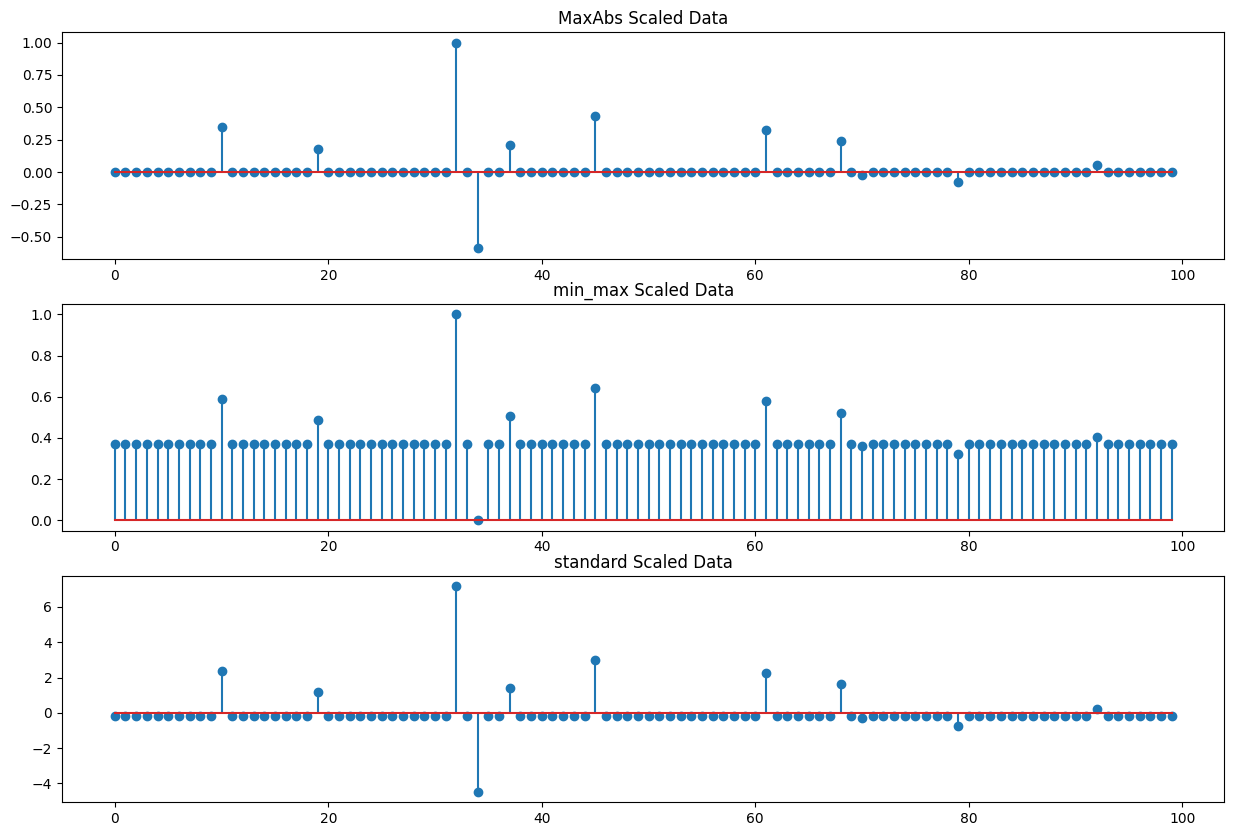

In [104]:
fig, ax = plt.subplots(3,1,figsize =(15,10))
ax[0].stem(Max_Abs_scaled_data)
ax[0].set_title("MaxAbs Scaled Data")
ax[1].stem(scaled_data_min_max)
ax[1].set_title("min_max Scaled Data")
ax[2].stem(scaled_data_std)
ax[2].set_title("standard Scaled Data")
plt.show()

In [107]:
print("Before normalization:",np.count_nonzero(signal),"points")
print("After MaxAbs normalization:",np.count_nonzero(Max_Abs_scaled_data))
print("After Min-Max normalization:",np.count_nonzero(scaled_data_min_max))
print("After Standard normalization:",np.count_nonzero(scaled_data_std))

Before normalization: 11 points
After MaxAbs normalization: 11
After Min-Max normalization: 99
After Standard normalization: 100


# 2

In [108]:
import pandas as pd

file_path = r'./Advertising.csv'
df = pd.read_csv(file_path)
print(df.head())

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


In [109]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)


In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_

print("coefficients", coefficients)
print("intercept", intercept)

coefficients [ 0.04458402  0.19649703 -0.00278146]
intercept 2.994893030495323


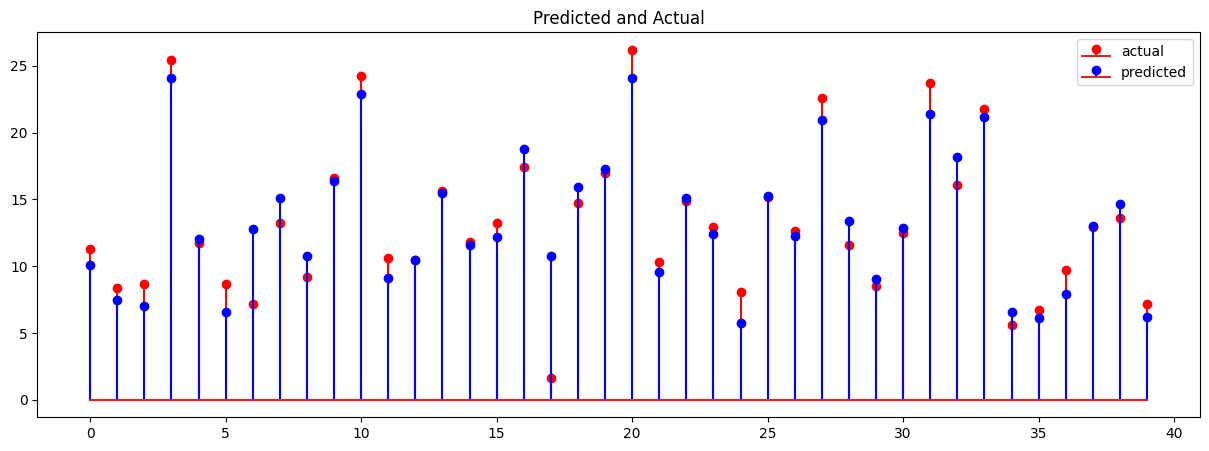

In [114]:
yhat_test = model.predict(X_test)
plt.figure(figsize=(15,5))
plt.title("Predicted and Actual")
plt.stem(y_test.values, 'r' ,label='actual')
plt.stem(yhat_test ,'b', label='predicted')
plt.legend()
plt.show()

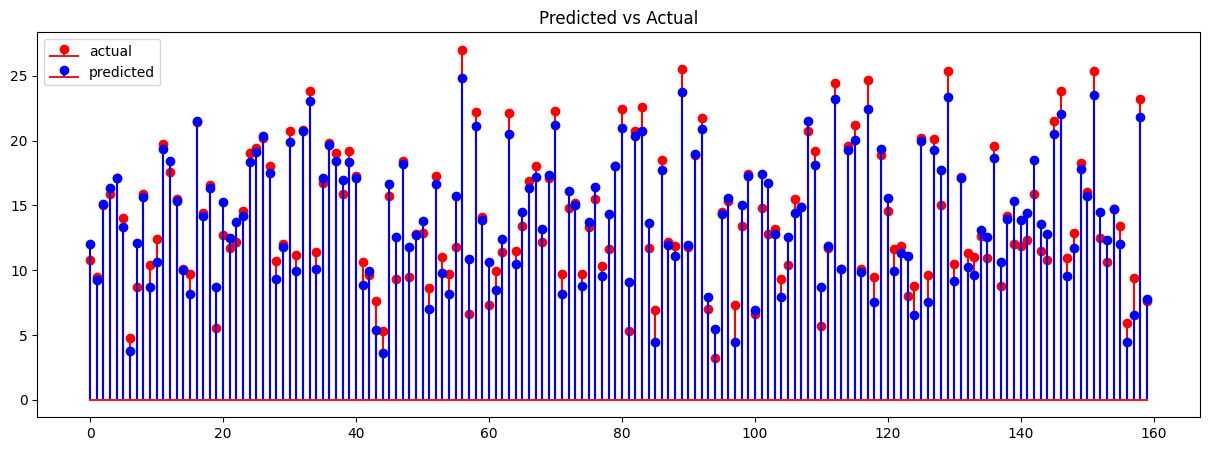

In [115]:
yhat_train = model.predict(X_train)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Predicted vs Actual")
plt.stem(y_train.values, 'r' ,label='actual')
plt.stem(yhat_train ,'b', label='predicted')
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t

RSS_test = np.sum((yhat_test - y_test)**2)
print('RSS_test=', RSS_test)

RSE_test = np.sqrt(1/(len(y_test)-len(coefficients)-1)*RSS_test)
print('RSE_test=', RSE_test)

MSE_test = mean_squared_error(y_test,yhat_test)
print('MSE_test=',MSE_test)

r2_test = r2_score(y_test,yhat_test)
print('r2 score test=',r2_test)

sigma_test = np.var(y_test - yhat_test)
SE2w0_test =  sigma_test*(1/len(y_test) + np.mean(X_test)**2/np.sum((X_test - np.mean(X_test))**2))
SE2w1_test = sigma_test/np.sum((X_test - np.mean(X_test))**2)
print('SE_test_w0=', SE2w0_test)
print('SE_test_w1=', SE2w1_test)


w_1=model.coef_
w_0=model.intercept_
tw1_test = (w_1 - 0)/np.sqrt(SE2w1_test)
tw0_test = (w_0 - 0)/np.sqrt(SE2w0_test)
print('tw1_test=',tw1_test)
print('tw0_test=',tw0_test)

pw1_test = t.sf(np.abs(tw1_test), len(y_test)-len(coefficients)-1)
pw0_test = t.sf(np.abs(tw0_test), len(y_test)-len(coefficients)-1)
print('pw1 test for w1: ', pw1_test)
print('pw1 test for w0: ',pw0_test)

RSS_test= 176.08473165798722
RSE_test= 2.2116153702791994
MSE_test= 4.40211829144968
r2 score test= 0.8601145185017869
SE_test_w0= TV           0.143985
radio        0.346286
newspaper    0.407027
dtype: float64
SE_test_w1= TV           0.000009
radio        0.000060
newspaper    0.000076
dtype: float64
tw1_test= TV           15.152338
radio        25.351631
newspaper    -0.320080
dtype: float64
tw0_test= TV           7.892645
radio        5.089365
newspaper    4.694286
dtype: float64
pw1 test for w1:  [1.68706802e-17 7.48382493e-25 3.75378883e-01]
pw1 test for w0:  [1.14913586e-09 5.71526361e-06 1.90458389e-05]


In [94]:
RSS_train = np.sum((yhat_train - y_train)**2)
print('RSS_train=', RSS_train)

RSE_train = np.sqrt(1/(len(y_train)-len(coefficients)-1)*RSS_train)
print('RSE_train=', RSE_train)

MSE_train = mean_squared_error(y_train,yhat_train)
print('MSE_train=',MSE_train)

r2_train = r2_score(y_train,yhat_train)
print('r2 score train=',r2_train)

sigma_train = np.var(y_train - yhat_train)
SE2w0_train =  sigma_train*(1/len(y_train) + np.mean(X_train)**2/np.sum((X_train - np.mean(X_train))**2))
SE2w1_train = sigma_train/np.sum((X_train - np.mean(X_train))**2)
print('SE_train_w0=', SE2w0_train)
print('SE_train_w1=', SE2w1_train)


w_1=model.coef_
w_0=model.intercept_
tw1_train = (w_1 - 0)/np.sqrt(SE2w1_train)
tw0_train = (w_0 - 0)/np.sqrt(SE2w0_train)
print('tw1_train=',tw1_train)
print('tw0_train=',tw0_train)

pw1_train = t.sf(np.abs(tw1_train), len(y_train)-len(coefficients)-1)
pw0_train = t.sf(np.abs(tw0_train), len(y_train)-len(coefficients)-1)
print('pw1 train for w1: ', pw1_train)
print('pw1 train for w0: ',pw0_train)

RSS_train= 385.0903609310249
RSE_train= 1.571154974751395
MSE_train= 2.406814755818906
r2 score train= 0.9067114990146383
SE_train_w0= TV           0.020020
radio        0.046569
newspaper    0.051812
dtype: float64
SE_train_w1= TV           0.000001
radio        0.000007
newspaper    0.000008
dtype: float64
tw1_train= TV           42.980703
radio        75.264916
newspaper    -0.986517
dtype: float64
tw0_train= TV           21.166743
radio        13.878127
newspaper    13.157233
dtype: float64
pw1 train for w1:  [1.11651611e-088 8.02602658e-125 1.62703482e-001]
pw1 train for w0:  [5.11297874e-48 2.46737328e-29 2.24669597e-27]


Text(0.5, 0, 'newspaper')

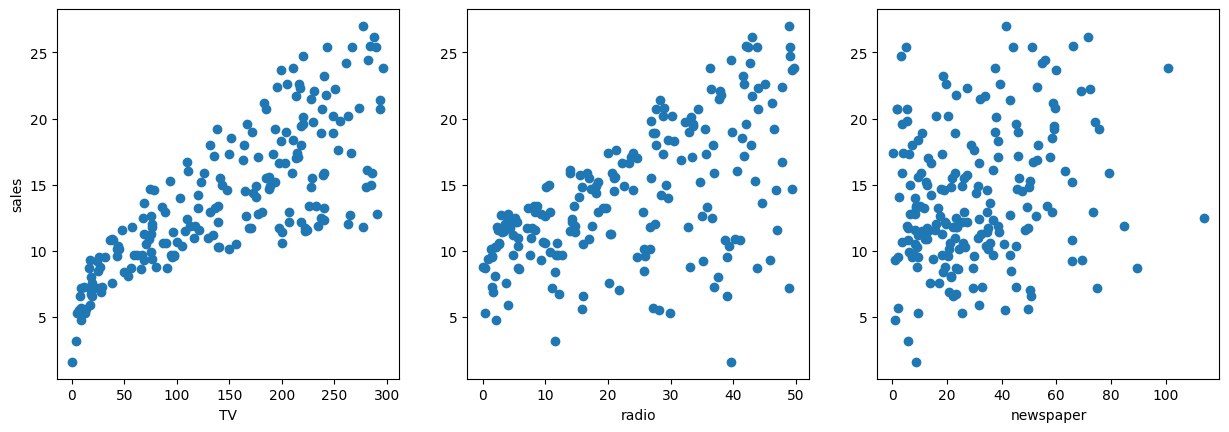

In [116]:
fig , ax = plt.subplots(1,3)
fig.set_figwidth(15)
ax[0].set_ylabel('sales')
ax[0].scatter(df['TV'], df['sales'])
ax[0].set_xlabel('TV')
ax[1].scatter(df['radio'], df['sales'])
ax[1].set_xlabel('radio')
ax[2].scatter(df['newspaper'], df['sales'])
ax[2].set_xlabel('newspaper')

In [117]:
input_data1 = np.array([[25,25,0]])
input_data2 = np.array([[50,0,0]])
input_data3 = np.array([[0,50,0]])
print("predict 1 [25,25,0]: ",model.predict(input_data1))
print("predict 2 [50,0,0]: ",model.predict(input_data2))
print("predict 3 [0,50,0]: ",model.predict(input_data3))

predict 1 [25,25,0]:  [9.02191939]
predict 2 [50,0,0]:  [5.22409404]
predict 3 [0,50,0]:  [12.81974474]


c:\python\Python311\cv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\python\Python311\cv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\python\Python311\cv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 3

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\MSII\Documents\sem 5\pattern recognition\assignment 1\Assignment 01 supporting materials-20230908\dataset.csv'
data_set = pd.read_csv(file_path)
print(data_set.head())

   i  xi     yi
0  1   0  20.26
1  2   1   5.61
2  3   2   3.14
3  4   3 -30.00
4  5   4 -40.00


plot data set

coefficients [-3.55727273]
intercept 3.916727272727277


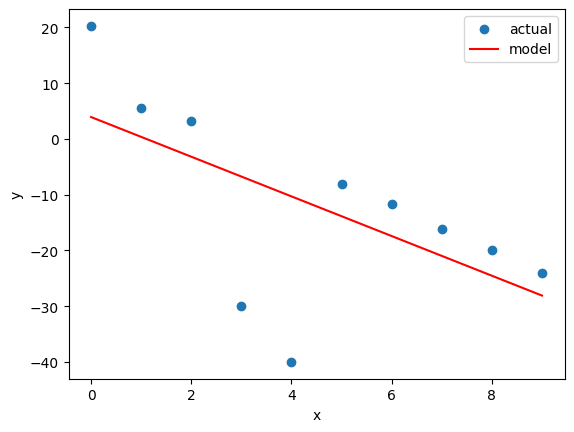

In [98]:
X = data_set[['xi']]
Y = data_set['yi']

model2 = LinearRegression().fit(X, Y)
print("coefficients", model2.coef_)
print("intercept", model2.intercept_)

#plot the data and the model prediction
plt.scatter(X,data_set['yi'],label='actual')
plt.plot(X, model2.predict(X), color='red',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [99]:
def loss(w, beta, x,y,N):
    # N = len(x)
    loss_val = 0
    for i in range(N):
        loss_val += ((y.iloc[i]-(w[0] + w[1]*x.iloc[i]))**2)/(((y.iloc[i]-(w[0] + w[1]*x.iloc[i]))**2)+beta**2)
    loss_val/=N
    return loss_val            

In [100]:
w1 = np.array([12, -4])
w2 = np.array([3.91 , -3.55])

print('loss1 :',loss(w1, 1, X,Y,10))
print('loss2 :',loss(w2, 1, X,Y,10))

loss1 : xi    0.435416
Name: 0, dtype: float64
loss2 : xi    0.972847
Name: 0, dtype: float64


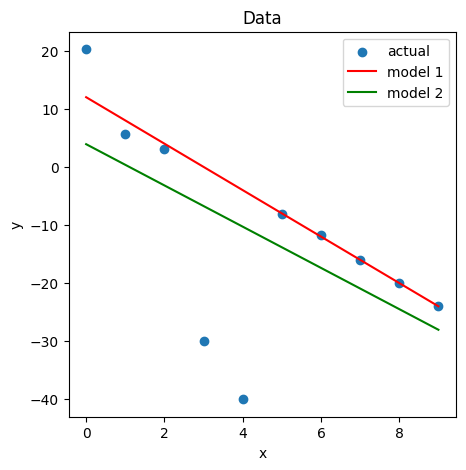

In [101]:
plt.figure(figsize=(5,5))
plt.title("Data")
plt.scatter(X,data_set['yi'],label='actual')
plt.plot(X, w1[0] + w1[1]*X, color='red',label='model 1')
plt.plot(X, w2[0] + w2[1]*X, color='green',label='model 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()